In [1]:
import json

import matplotlib.pyplot as plt

from CCAgT_utils.visualization import plot
from CCAgT_utils import Categories

In [2]:
helper_path = '../../data/samples/CCAgT_dataset_metadata.json'
with open(helper_path, 'r') as hf:
    dataset_helper = json.load(hf)
    
categories_helpper = dataset_helper['categories']
ccagt_helper = Categories.Helper(categories_helpper)

In [3]:
from CCAgT_utils.visualization.colors import rgb_to_rgba
get_color = {k: rgb_to_rgba(v, True) for k, v in ccagt_helper.colors_by_category_id.items()}
get_name = ccagt_helper.name_by_category_id


In [4]:
from CCAgT_utils.types.annotation import BBox

boxes = [BBox(100, 25, 40, 75, 1),
         BBox(300, 1000, 100, 50, 1),
         BBox(800, 25, 50, 50, 1),
         BBox(500, 500, 90, 100, 1),
         BBox(520, 520, 7, 7, 2),
         BBox(565, 565, 5, 5, 3)]

In [5]:
import numpy as np
img = np.zeros((1200, 1600))

## Draw the boxes

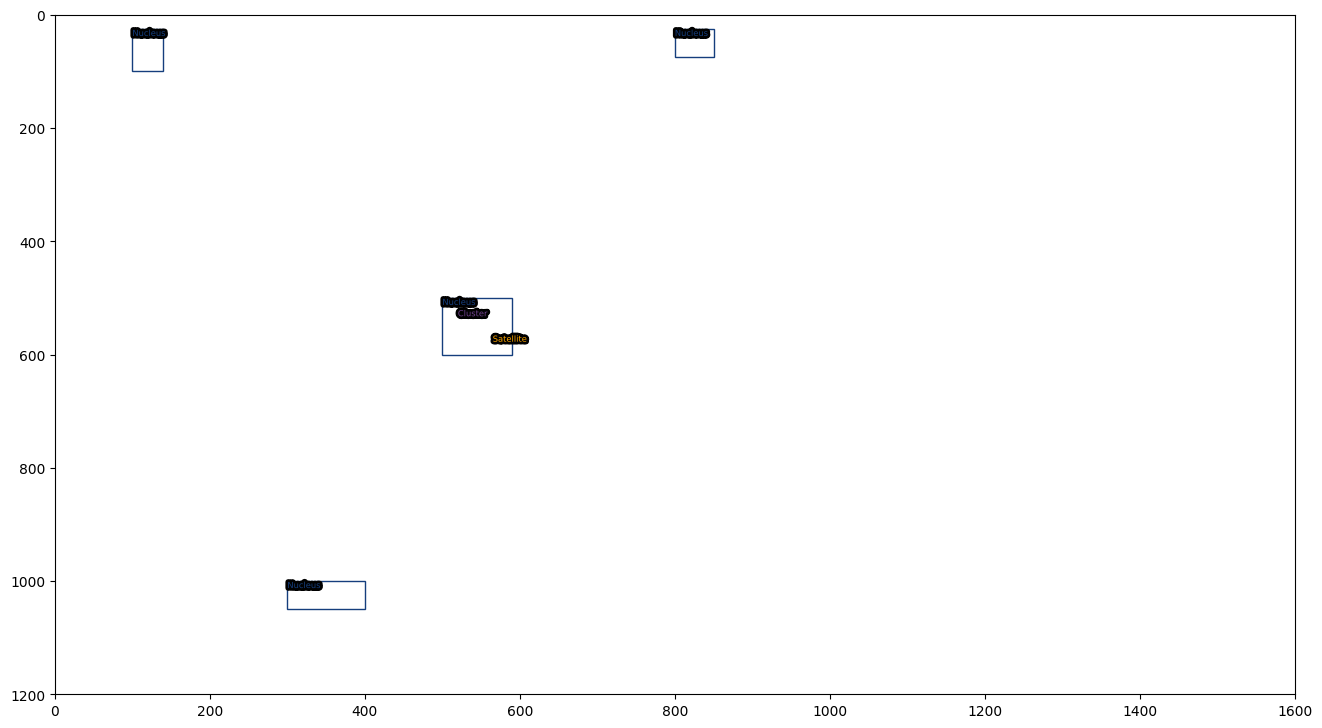

In [6]:
fix, ax = plt.subplots(1, 1,figsize=(16, 9), dpi=100)
ax.set_xlim([0, 1600])
ax.set_ylim([1200, 0])

plot.bbox(boxes, ax, get_color, fontsize=6, get_categories_name=get_name)
plt.show()

## Plot image with boxes

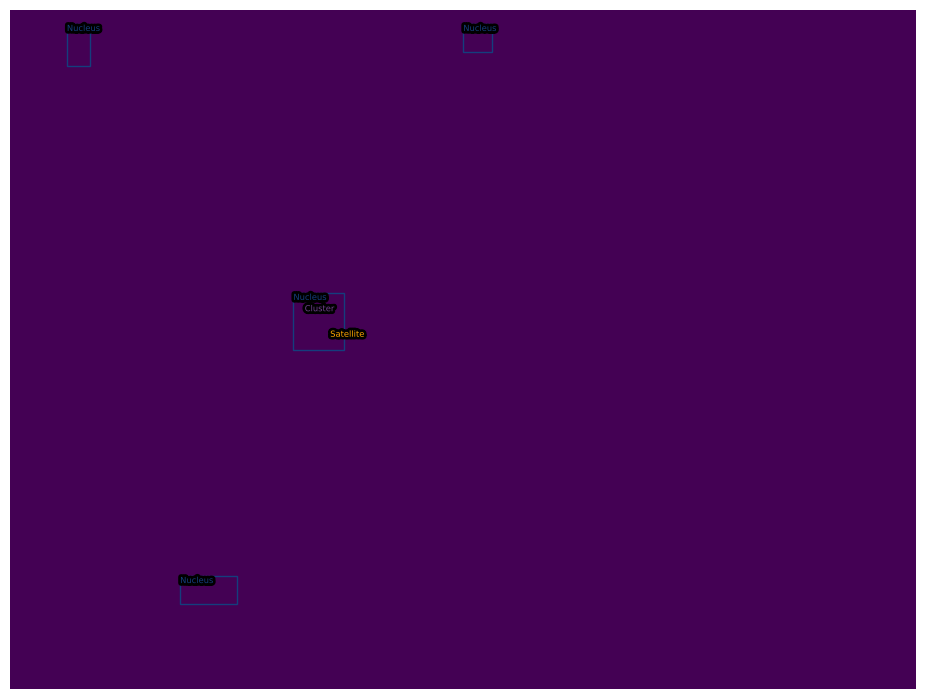

In [7]:
fix, ax = plt.subplots(1, 1,figsize=(16, 9), dpi=100)
plot.image_with_boxes(img, boxes, ax, get_color, get_categories_name=get_name, fontsize=6)
plt.show()

### Plot sample image and the boxes

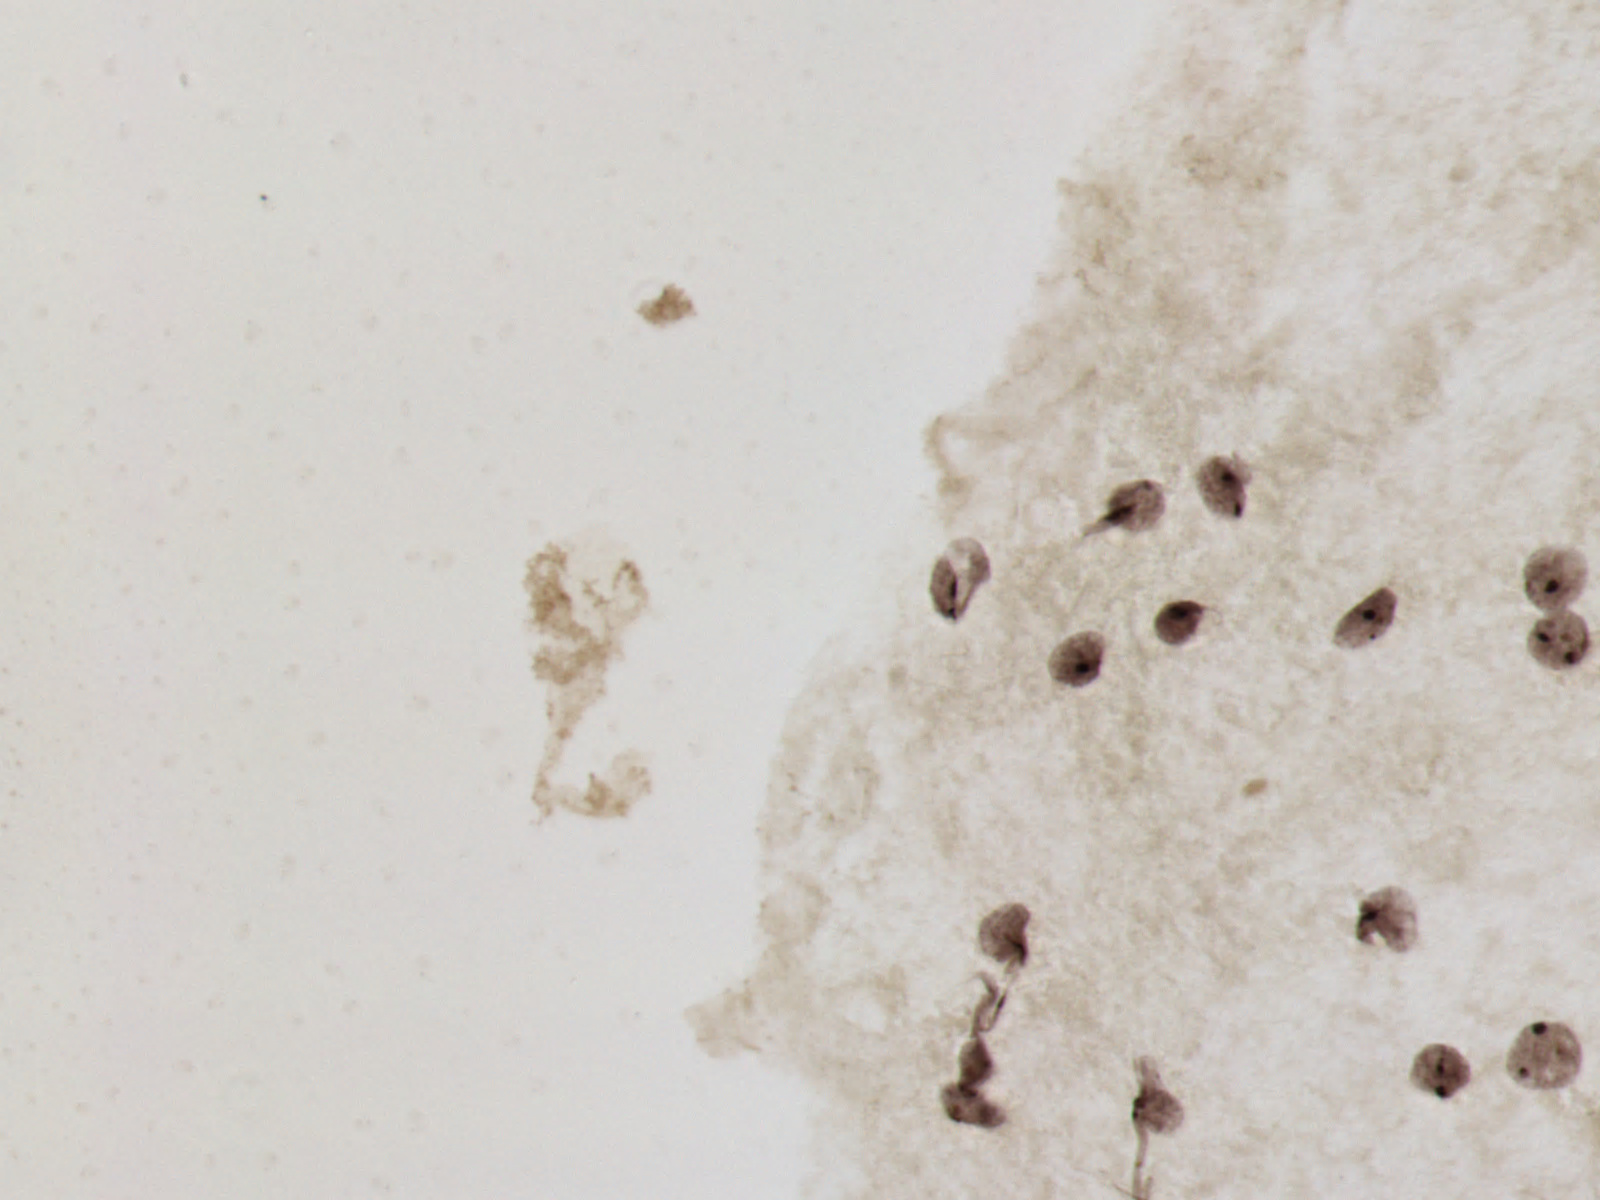

In [8]:
from PIL import Image

image_name = 'C_13509_-270720_116640.jpg'
image_path = f'../../data/samples/images/{image_name}'
img = Image.open(image_path)
img

#### load the annotations into the right format

In [9]:
from CCAgT_utils.converters import LabelBox
labelbox_raw_path = '../../data/samples/sanitized_sample_labelbox.json'

with open(labelbox_raw_path) as f:
    labelbox_raw =  json.load(f)

lb_ann = LabelBox.LabelBox_Annotations(labelbox_raw, categories_helpper)

CCAgT_ann = lb_ann.to_CCAgT()

df = CCAgT_ann.df
df['geo_type'] = CCAgT_ann.geometries_type()

/home/ghost/Documents/git/CCAgT-utils/venv/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [10]:
sat_series = df.loc[(df['category_id']==3) & (df['geo_type']=='Point'), 'geometry']

df.loc[(df['category_id']==3) & (df['geo_type']=='Point'), 'geometry'] = CCAgT_ann.satellite_point_to_polygon(sat_series)

df['geo_type'] = CCAgT_ann.geometries_type()

df['geometry'] = CCAgT_ann.fit_geometries_to_image_boundary()

In [11]:
from CCAgT_utils.types.annotation import bounds_to_BBox

In [12]:
image_boxes = df[df['image_name'] == image_name.replace('.jpg', '')].apply(lambda r: bounds_to_BBox(r['geometry'].bounds, r['category_id']),
                                                             axis=1).to_numpy().tolist()

In [13]:
image_boxes[:2], len(image_boxes)

([BBox(x_init=1197, y_init=455, width=50, height=64, category_id=1),
  BBox(x_init=1409, y_init=1042, width=61, height=58, category_id=1)],
 27)

#### plot image with boxes

In [14]:
handles = plot.create_handles(get_color, get_name)

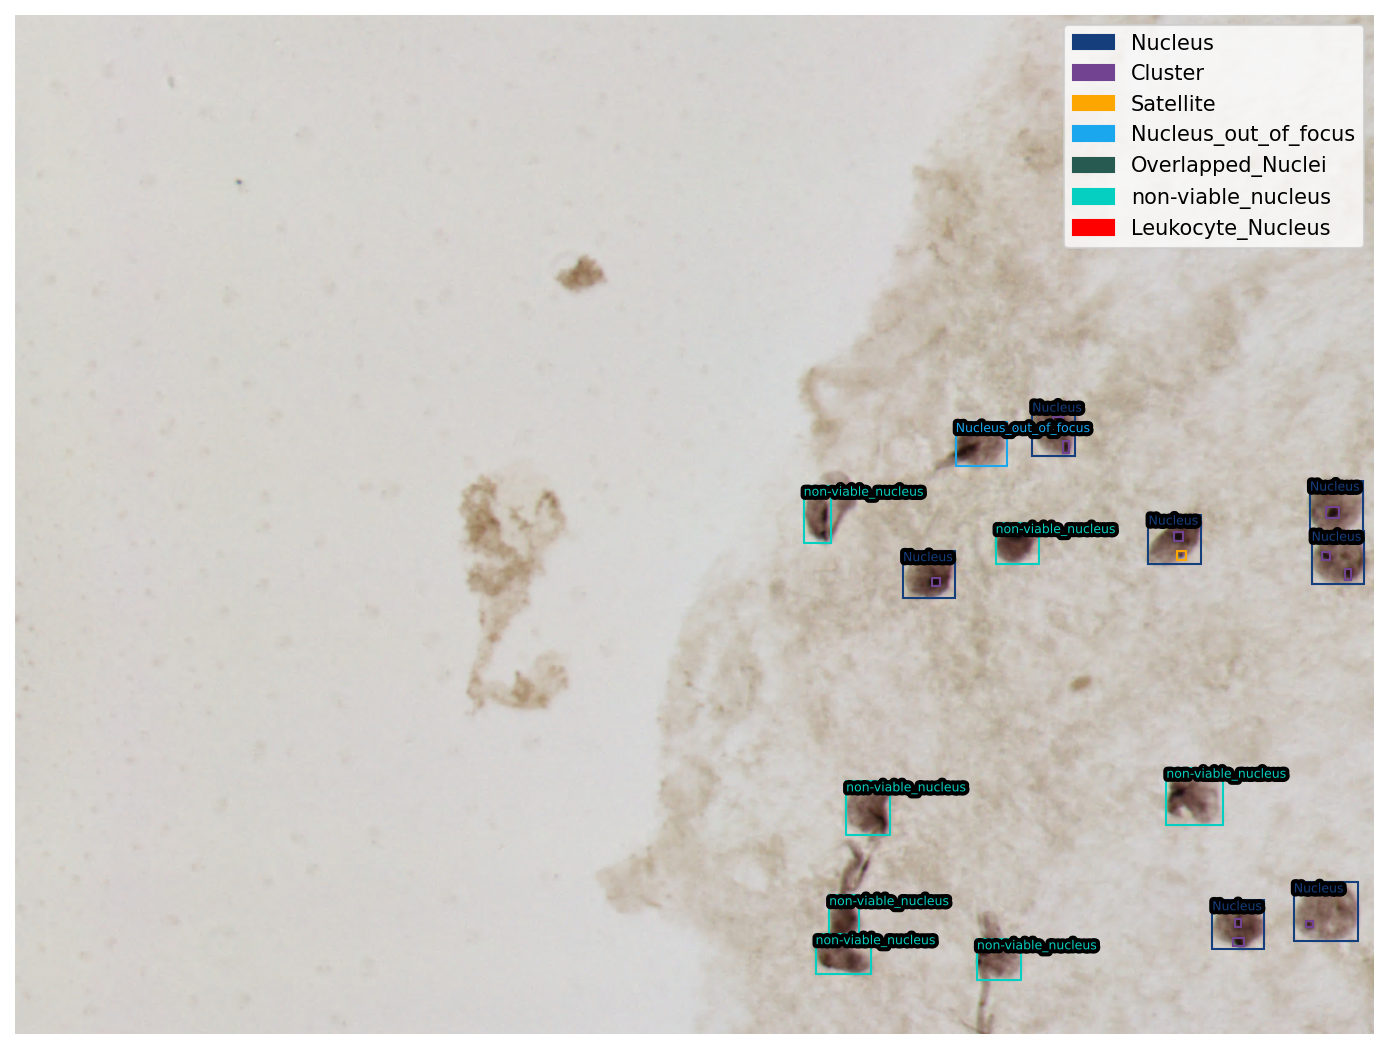

In [15]:
fix, ax = plt.subplots(1, 1,figsize=(16, 9), dpi=150)
plot.image_with_boxes(img, image_boxes, ax, get_color, get_categories_name=get_name, fontsize=6, without_text={2,3})
ax.legend(handles=handles)
plt.show()